In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotib inline

UsageError: Line magic function `%matplotib` not found.


In [2]:
#collecting data
data=pd.read_csv(r'c:\Users\acer\Downloads\iris.csv')

In [3]:
data.drop(columns=["Id","Species"],inplace=True)

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


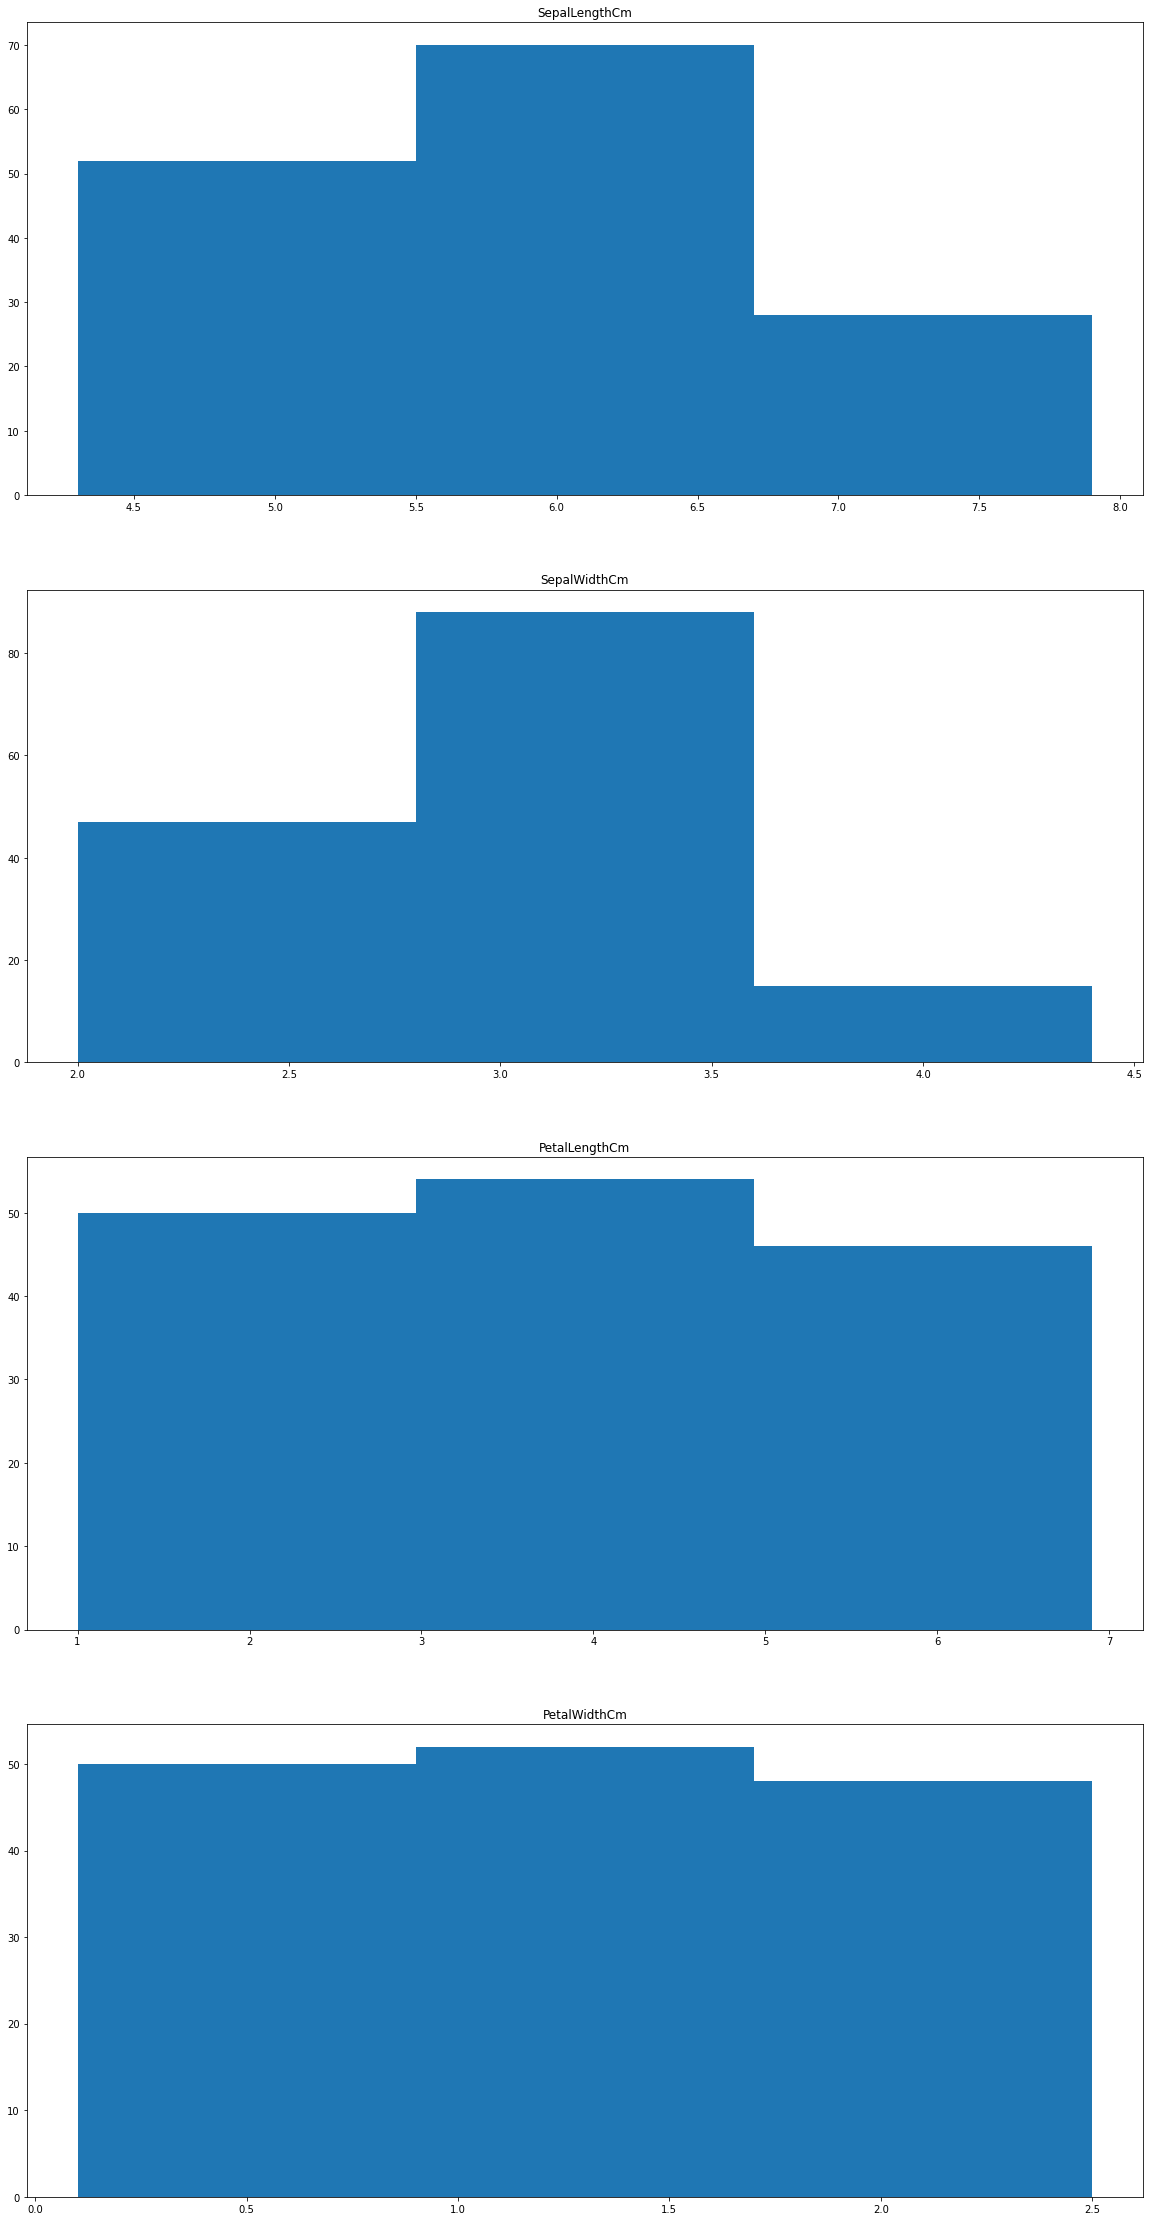

In [5]:
fig,axes=plt.subplots(4,1,figsize=(20,40))

for col,axis in zip(data.columns,axes):
    axis.hist(data[[col]],bins=3)
    axis.set_title(f'{col}')

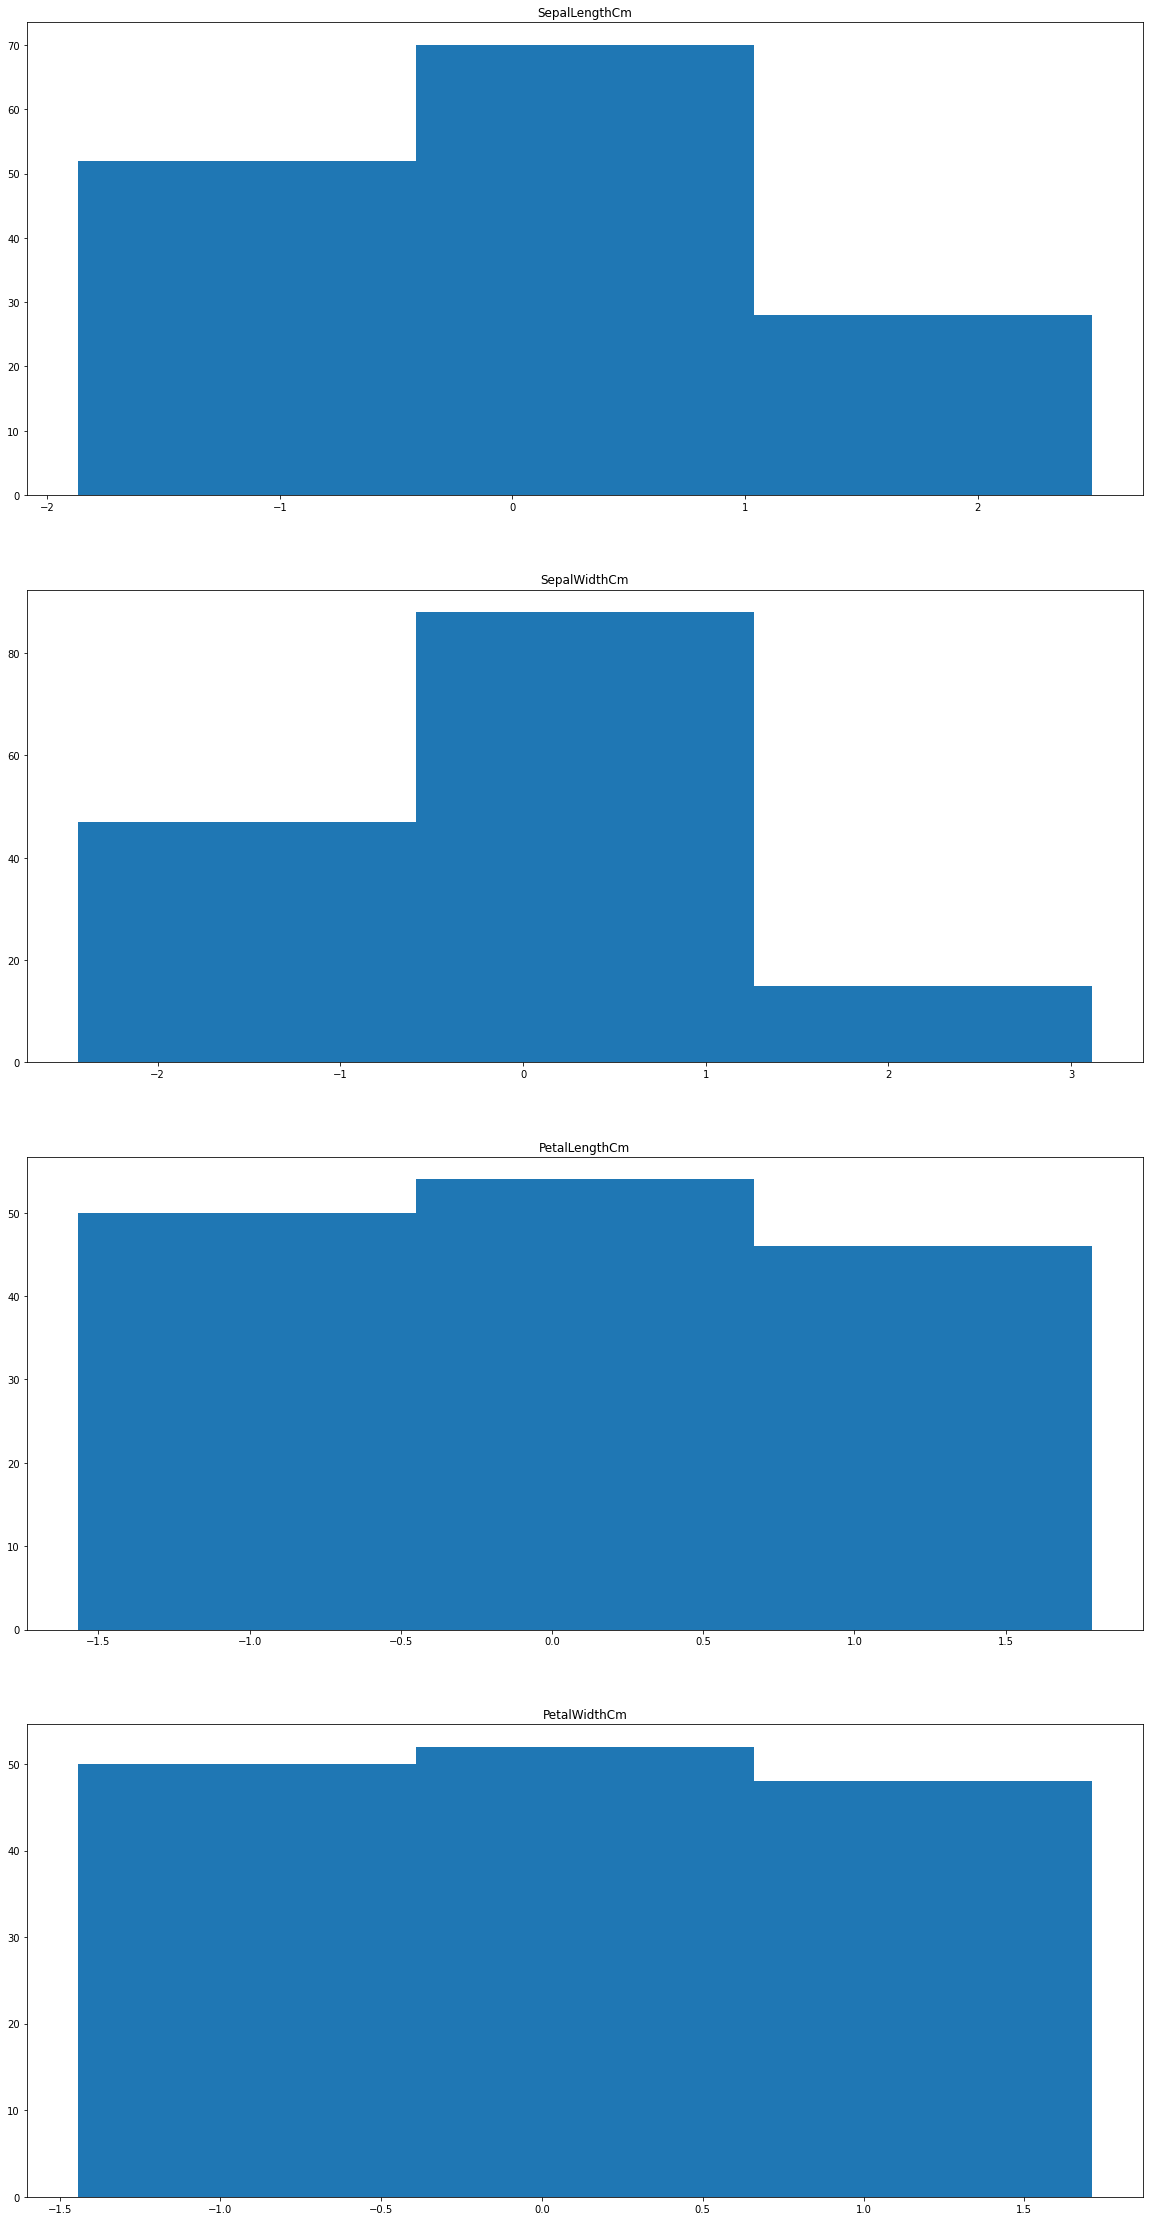

In [6]:
#data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler=StandardScaler()
scaledx=scaler.fit_transform(data)
scaledx[:,0]

fig1,axes1=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes1):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

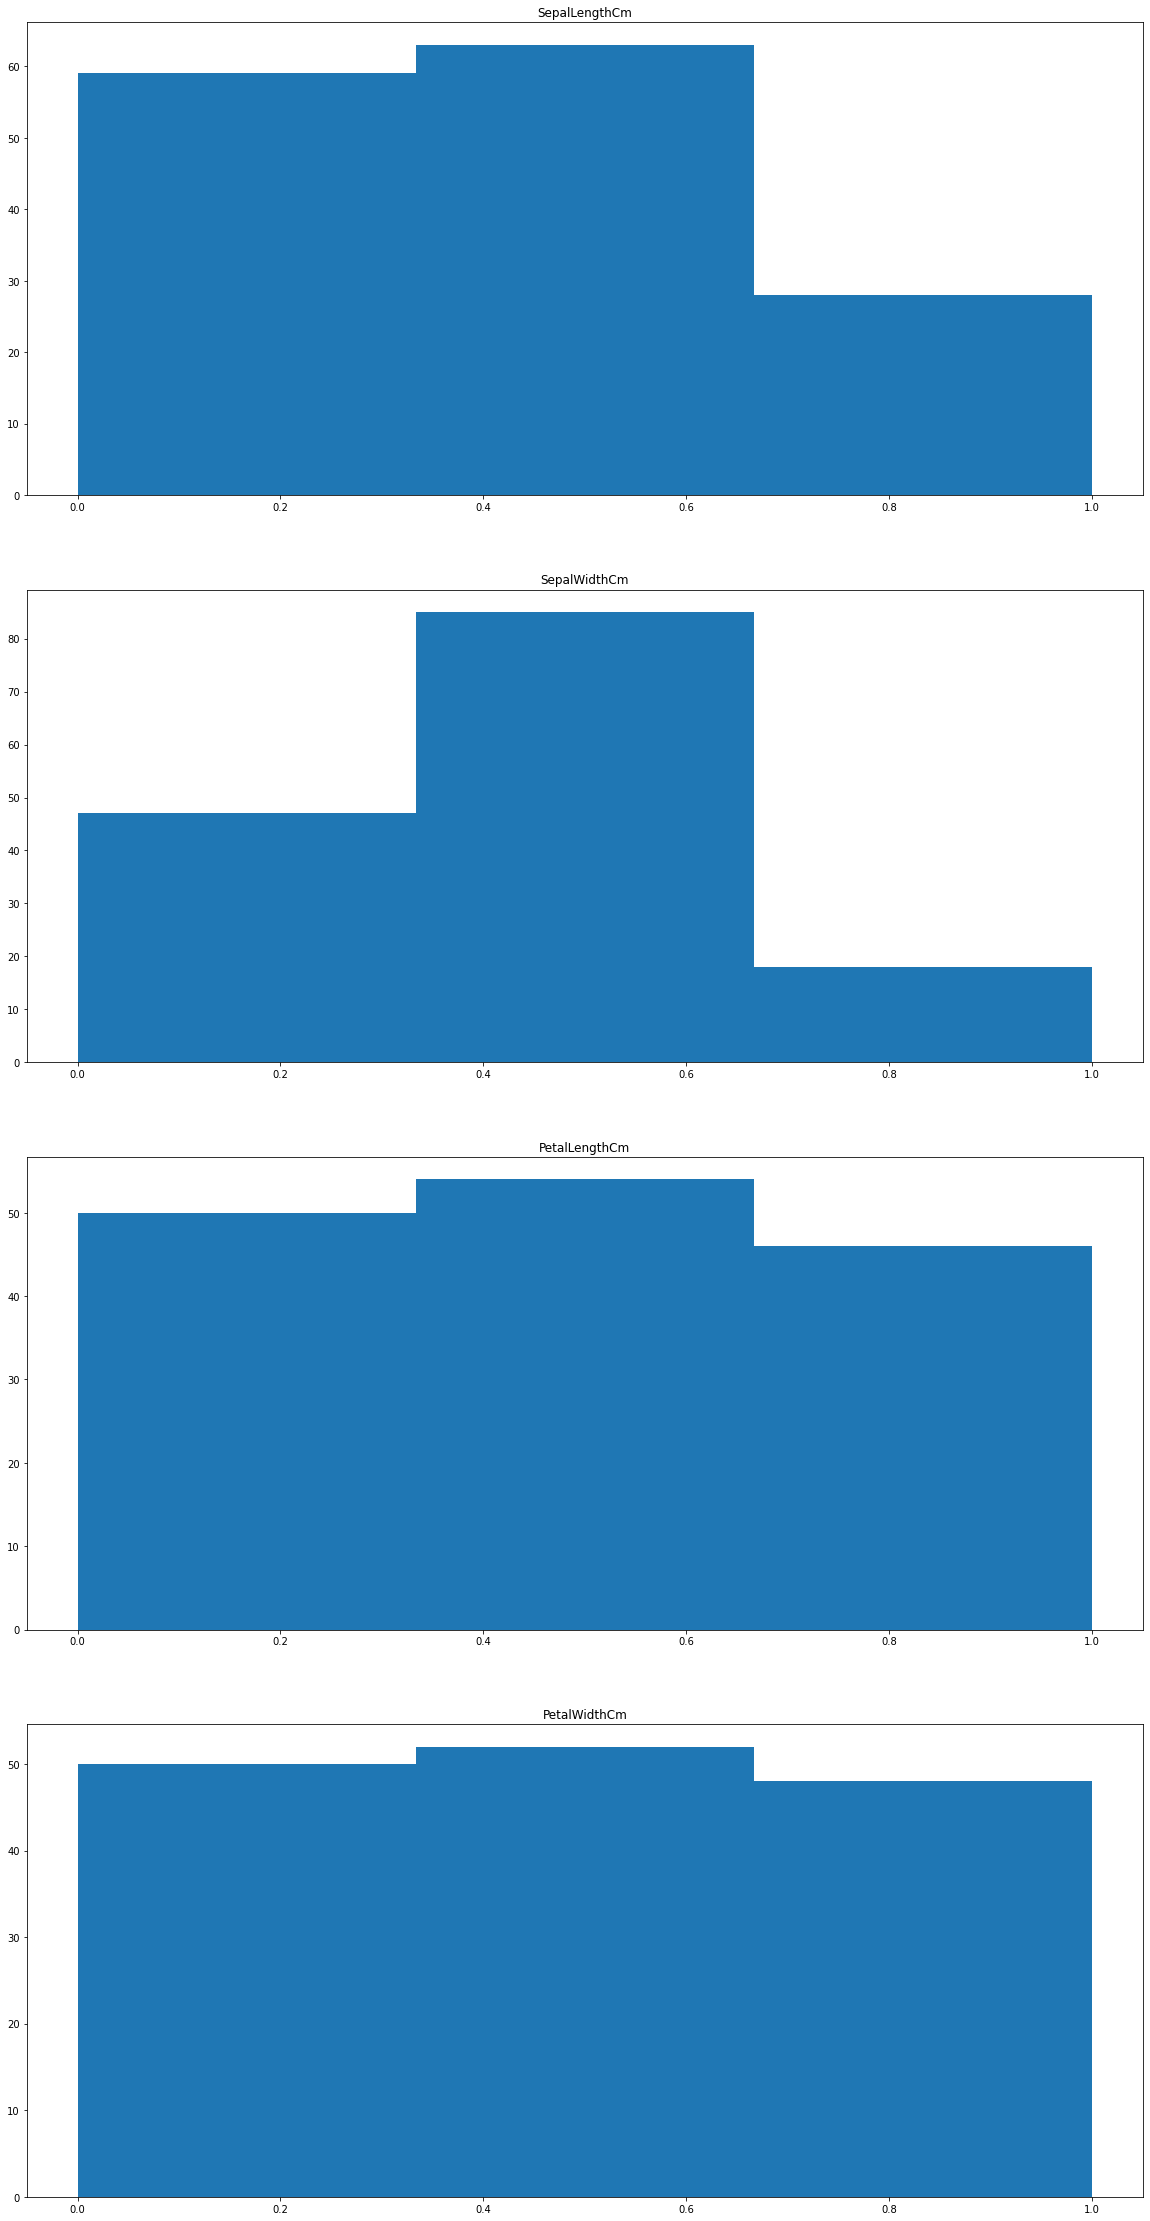

In [7]:
mscaler=MinMaxScaler()
scaledx=mscaler.fit_transform(data)
#scaledx[:,0]

fig2,axes2=plt.subplots(4,1,figsize=(20,40))

for index, col,axis in zip(range(4),data.columns,axes2):
    axis.hist(scaledx[:,index],bins=3)
    axis.set_title(f'{col}')

In [9]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering()
model.fit_predict(scaledx)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

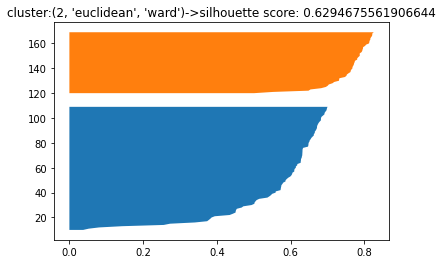

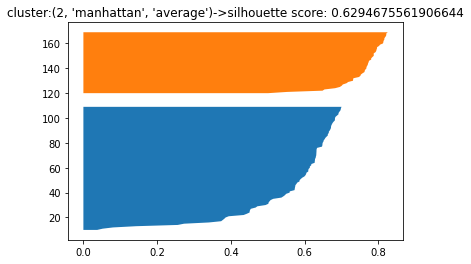

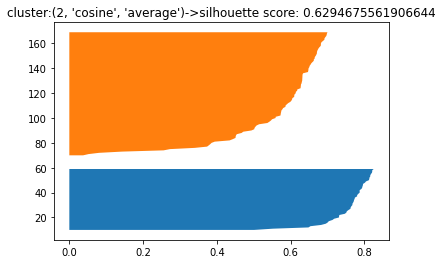

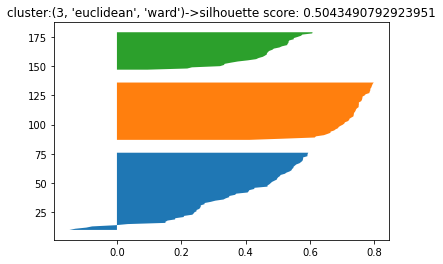

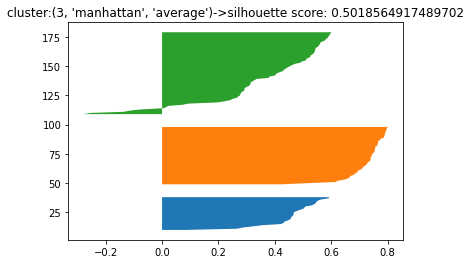

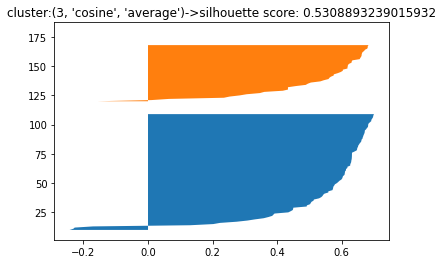

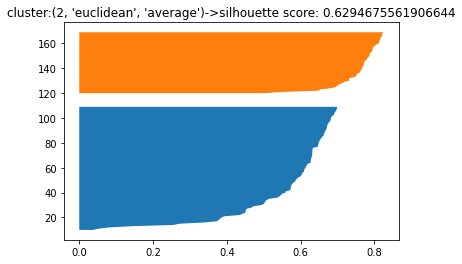

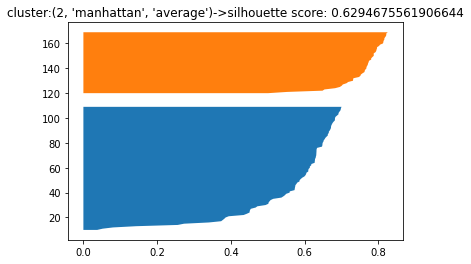

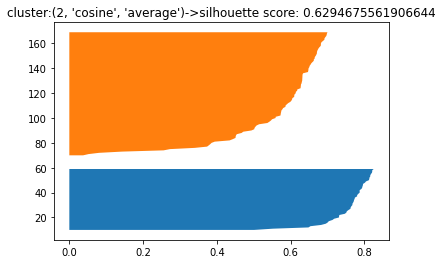

In [13]:
from sklearn.metrics import silhouette_score,silhouette_samples

paramgrid=[
    (2,'euclidean','ward'),(2,'manhattan','average'),(2,'cosine','average'),
    (3,'euclidean','ward'),(3,'manhattan','average'),(3,'cosine','average'),
    (2,'euclidean','average'),(2,'manhattan','average'),(2,'cosine','average'),
]
for param  in paramgrid:
    hc=AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
    ypred=hc.fit_predict(scaledx)
    sscore,ssample=silhouette_score(scaledx,ypred),silhouette_samples(scaledx,ypred)
    ylow=10
    for i in set(hc.labels_):
        isample=ssample[ypred==i]
        isample.sort()
        yup=ylow+isample.shape[0]
        plt.fill_betweenx(np.arange(ylow,yup),0,isample)
        plt.title(f'cluster:{param}->silhouette score: {sscore}')
        ylow=yup+10
    plt.show()    